In [35]:
%matplotlib inline
from matplotlib import pyplot
import numpy
import numpy as np
import healpy

from scipy.interpolate import NearestNDInterpolator


import logging
logging.basicConfig(level=logging.DEBUG)

import healpy

import vm
from vm.pypelid.survey.observation import Survey
from vm.pypelid.utils import wcs_lib

In [2]:
import pyfits

In [3]:
snrmap = pyfits.open("data/snr_nisp_gr_mpdr_zodi_outfield_map.fits")[0].data

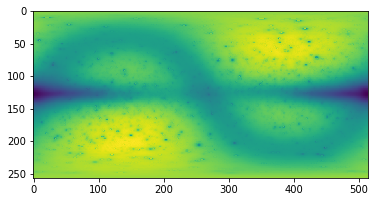

In [4]:
pyplot.imshow(snrmap)

In [5]:
gal_lat_bin = (-89.6, 89.6)
gal_lon_bin = (0, 359.8)
gal_sample = 0.7

def y_to_lat(y):
    return gal_lat_bin[0] + (y*gal_sample)

def x_to_lon(x):
    return gal_lon_bin[0] + (x*gal_sample)

def lat_to_y(lat):
    return (lat - gal_lat_bin[0])/ gal_sample

def lon_to_x(lon):
    return (lon - gal_lon_bin[0])/gal_sample

def interp_map(maps):
    coords = numpy.asarray(numpy.meshgrid(x_to_lon(numpy.arange(0, maps.shape[1])), y_to_lat(numpy.arange(0, maps.shape[0]))))
    return NearestNDInterpolator(numpy.asarray([coords[0].ravel(), coords[1].ravel()]).T, maps.ravel())

In [6]:
snr_interp = interp_map(snrmap)

In [7]:
nside = 128
theta, phi = healpy.pix2ang(nside, np.arange(12*nside**2))
lon = 180/np.pi * phi
lat = 90 - 180/np.pi * theta

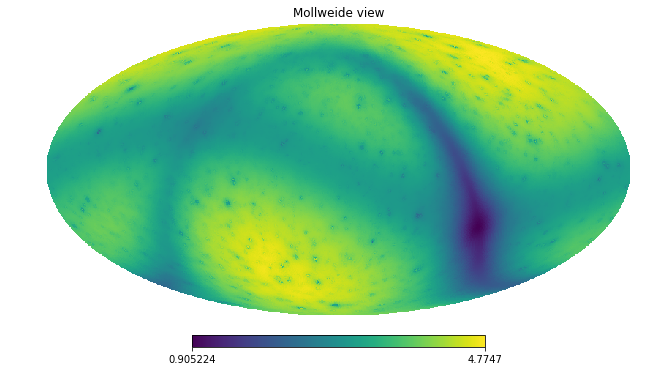

In [37]:
glon,glat = wcs_lib.euler(lon,lat,select=1)
m = snr_interp(glon,glat)
healpy.mollview(m)

In [9]:
Swide = Survey(
    survey_file='/Users/ben/euclid/pypelid/in/EUC_SOC_OSSSURVEY-SC3_20170105T140137.4Z_02.00.xml',
    surveyid='WIDE_SURVEY', 
    dither_offsets=(0,0),
    dither_angles=(0,),
    verbose=True, 
    pixel_mask_nside=128,
)

DEBUG:vm.pypelid.survey.observation:Loading /Users/ben/euclid/pypelid/in/EUC_SOC_OSSSURVEY-SC3_20170105T140137.4Z_02.00.xml
DEBUG:vm.pypelid.survey.observation:Selecting SurveyId WIDE_SURVEY
DEBUG:vm.pypelid.survey.observation:> Computing dither positions and orientations of 31486 fields.


In [10]:
Swide.survey_mask()

In [18]:
Swide.mask._build_pixel_mask()

DEBUG:minimask.mask:Building mask lookup tree
DEBUG:minimask.mask:Mask search radius: 0.002098
DEBUG:minimask.mask:build pixel mask nside=128 order=ring


In [21]:
outside = Swide.mask.params['pixel_mask'] == False
print inside

[ True  True  True ...,  True  True  True]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


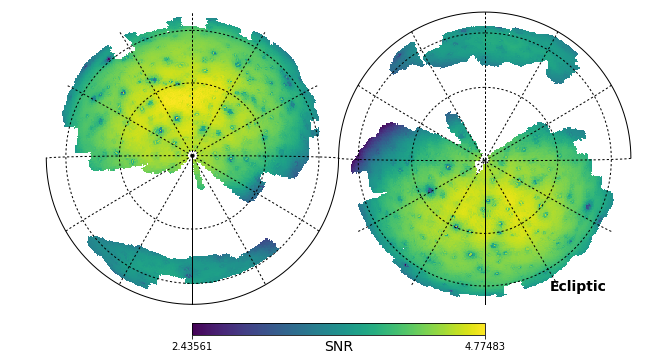

In [39]:
m[outside] = float('nan')

from matplotlib import cm
cmap = cm.viridis
cmap.set_under('w')
cmap.set_bad('w')
healpy.orthview(m, coord=('C','E'), rot=(0,89), cmap=cmap, cbar=True, title="", unit="SNR")
healpy.graticule()
pyplot.savefig("figs/snr_map.pdf")

In [29]:
m[0]

4.1860626744548366